# Libraries

In [49]:
!pip install unidecode
!pip install spacy
!pip install nltk
!python -m spacy download en_core_web_sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 28.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [nltk]1/2 [nltk]
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 42.4 MB/s  0:00:00 eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [4]:
import os
import pandas as pd
import re       # regex expressions
import ast      # for tag list
import unidecode  # replacement of accented characters
import spacy


# Stage 1: Enhanced Data Cleaning, Preprocessing, and Exploratory Analysis

## 1.1 Data Collection & Cleaning

*Done by: Marisa  - Checked by: Alla*

## Environment setup
Switch: "local" (VS Code + GitHub) | "colab" (Google Colab + Drive)

In [5]:
ENV = "local"

### Data Import


- In your Google Drive, create a folder "CLT" and upload the csv with its original name (downloaded from Kaggle).

In [6]:
if ENV == "colab":
    from google.colab import drive
    drive.mount('/content/drive')

In [7]:
if ENV == "colab":
    csv_path = '/content/drive/My Drive/CLT/ai_media_dataset_20250911.csv'
else:
    csv_path = 'data/ai_media_dataset_20250911.csv'

df = pd.read_csv(csv_path)

df.head()

,Unnamed: 0,title,date,content,domain,url,tags
0,88571,Ricoh to provide customer support for Agility ...,2024-09-11,['The Digit humanoid could work in distributio...,therobotreport,https://www.therobotreport.com/ricoh-provides-...,"['Robotics', 'Video', 'BostonDynamics']"
1,92022,MTV VMAs 2024: Live shopping is coming to the ...,2024-09-11,"['In this article', ""When viewers tune in to t...",cnbc,https://www.cnbc.com/2024/09/11/mtv-vmas-2024-...,['GenerativeAI']
2,81522,Open-source imagery is transforming investigat...,2024-09-11,['Open-source online imagery can play a vital ...,theconversation,https://www.theconversation.com/open-source-im...,"['Disinformation', 'Video', 'Deepfake', 'Infor..."
3,81521,"With China seeking AI dominance, Taiwan’ s eff...",2024-09-11,"['Tensions between China, Taiwan and the U.S. ...",theconversation,https://www.theconversation.com/with-china-see...,"['MilitaryAndDefense', 'Missiles', 'HighPerfor..."
4,63808,Study links EV charging stations to increased ...,2024-09-11,['Countries globally are rapidly transitioning...,phys,https://phys.org/news/2024-09-links-ev-station...,"['Causality', 'Planning']"


In [8]:
df.shape

(16527, 7)

The dataset contains 16'527 observations with 7 columns.

### Removing Duplicates

In [9]:
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")

title_duplicate = df[df.duplicated(subset='title')]
print(f"Number of duplicate titles: {len(title_duplicate)}")

content_duplicate = df[df.duplicated(subset ='content')]
print(f"Number of duplicate content:{len(content_duplicate)}")

url_duplicate = df[df.duplicated(subset ='url')]
print(f"Number of duplicate URLs: {len(url_duplicate)}")

Number of duplicate rows: 0
Number of duplicate titles: 0
Number of duplicate content:9
Number of duplicate URLs: 0


There are no duplicate rows, titles and urls. But there is duplicate content. We take a closer look at the duplicate content:

In [10]:
duplicate_content_rows = df[df.duplicated(subset=['content'], keep=False)].sort_values(by='content')
print(duplicate_content_rows)

       Unnamed: 0                                              title  \
920         93651  Performance, Security FOMO Could Fuel The AI P...   
933         93649  A Performance, Security FOMO Could Fuel The AI...   
6354       105429  ProMat 2025 show planner: Bigger and better th...   
7070       105445  ProMat Show Planner: 2025 to be bigger and bet...   
2582       105328           Maximizing automation at Outdoor Network   
5174       105395    Maximizing automated systems at Outdoor Network   
3300        94135  Connect the dots: how to use relationship netw...   
9337        94172  Connecting the dots: how to use relationship n...   
3914       105357   Object and pedestrian detection solutions evolve   
5178       105394  Object and pedestrian detection warehouse safe...   
528          3230      Gen AI-Powered Reinvention: How APAC can Lead   
568          3232      Generative AI Powered Strategy in APAC Region   
4422       105373  Supply Chain Imperatives 2024 and Beyond - Su

As there are only nine duplicate rows, we can easily review the output above manually to identify the following patterns:

* **Titles:** There are slight differences that do not seem relevant regarding content (for example, with and without an article, or with and without a year).
* **Dates:** Publication dates vary, sometimes differing by several months.
* **Domains:** The source domain remains consistently identical across all duplicates.
* **URLs:** Links vary occasionally, typically reflecting different regional paths or language preferences.
* **Tags:** The assigned tags are always identical.


Since the duplicated content consistently originates from the same source domain, we have decided to retain only the earliest published instance of each text. This approach ensures we capture the relevant information precisely when it first emerged.

In [11]:
df['date'] = pd.to_datetime(df['date'])

df_sorted = df.sort_values(by='date', ascending=True)
df_unique = df_sorted.drop_duplicates(subset = 'content', keep = 'first')

df_unique.head()

,Unnamed: 0,title,date,content,domain,url,tags
0,88571,Ricoh to provide customer support for Agility ...,2024-09-11,['The Digit humanoid could work in distributio...,therobotreport,https://www.therobotreport.com/ricoh-provides-...,"['Robotics', 'Video', 'BostonDynamics']"
26,70996,AI Design Trends to Watch in 2025: From Photor...,2024-09-11,['Artificial Intelligence ( AI) is rapidly tra...,geeksforgeeks,https://www.geeksforgeeks.org/ai-design-trends...,"['Personalisation', 'NaturalLanguageProcessing..."
27,104159,AIs generate more novel and exciting research ...,2024-09-11,['The first statistically significant results ...,newatlas,https://newatlas.com/technology/llm-novel-rese...,"['LargeLanguageModel', 'ChatGPT', 'Anthropic',..."
28,73625,Argonne's HPC/AI User Forum Wrap Up,2024-09-11,['As fans of this publication will already kno...,hpcwire,https://www.hpcwire.com/2024/09/11/argonnes-hp...,"['HighPerformanceComputing', 'GenerativeAI', '..."
29,80150,Top 10: Supply Chain Optimisation Strategies,2024-09-11,['Supply chain optimisation has never been mor...,supplychaindigital,https://www.supplychaindigital.com/top10/top-1...,"['Finetuning', 'Traceable', 'Accountability', ..."


In [12]:
df_unique.shape

(16518, 7)

In [13]:
df_unique_content_duplicate = df_unique[df_unique.duplicated(subset ='content')]
print(f"Number of duplicate content:{len(df_unique_content_duplicate)}")

Number of duplicate content:0


We successfully removed duplicate rows. Checking for shape confirmed that 9 rows were removed as well as checking for duplicate content again.

### Handling missing values

Firstly, we check for missing values. We double check with different methods:
- **NA-Values**: Values that are actually missing and indicated as missing in the data
- **Empty string**: Missing values might not be identified because they are empty strings.
- **Placeholders**: Instead of an empty value, placeholders like "N/A" might be used. We check for the most common ones.
- **Empty Lists**: Tags are saved as lists. We check for empty lists.

In [14]:
# Check for NA-values
missing_values_NA = df_unique.isna()
print(f"Number of NA-values: {missing_values_NA.sum().sum()}")

# Check for empty strings
text_columns = df_unique.select_dtypes(include = ['object', 'string']).columns
empty_strings = df_unique[text_columns].apply(lambda col: col.str.strip() == '')
print(f"Number of empty strings: {empty_strings.sum().sum()}")

# Check for placeholders
placeholders = ['N/A', 'n/a', 'null', 'Null', 'none', 'None', 'unknown', 'Unknown', '-']
placeholder_values = df_unique.isin(placeholders)
print(f"Number of placeholders: {placeholder_values.sum().sum()}")

# Check for empty lists
empty_tags_count = (df_unique['tags'] == '[]').sum()
print("Empty tags count:", empty_tags_count)

Number of NA-values: 0
Number of empty strings: 0
Number of placeholders: 0
Empty tags count: 0


There are no missing values in this data set.

### Normalize Text

We create a function that cleans the text in regards of
- **Removal of html tags**: All content within brackets < > is removed to strip away any residual web formatting.
- **Replacing accented characters**: We use the unidecode library to replace all characters with accents (e.g., "é", "ö") with their closest ASCII equivalent ("e", "o") for better consistency.
- **Casing**: We transform the entire text to lower-case letters to ensure that words like "Tech" and "tech" are treated as the same token.
- **Removal of emojis**: WW remove all emoji-like patterns and special Unicode symbols that do not add semantic value to the text analysis.
- **Removal of irrelevant symbols**: We delete all symbols that are not letters, numbers, or spaces, replacing them with a single space to prevent words from merging.
- **Removal of white space**: We collapse multiple spaces into one and strip leading or trailing white spaces from the text.

For this, we use Regex expressions.

In [15]:
def clean_text(text):
    # Check if value is text
    if not isinstance(text, str):
        return text

    # HTML-tags
    text = re.sub(r'<[^>]+>', '', text)

    # Accented characters
    text = unidecode.unidecode(text)

    # Casing
    text = text.lower()

    # Emoji patterns
    emojis_pattern = re.compile(pattern="["
                        u"\U0001F600-\U0001F64F"
                        u"\U0001F300-\U0001F5FF"
                        u"\U0001F680-\U0001F6FF"
                        u"\U0001F1E0-\U0001F1FF"
                        u"\U00002500-\U00002BEF"
                        u"\U00002702-\U000027B0"
                        u"\U000024C2-\U0001F251"
                        u"\U0001f926-\U0001f937"
                        u"\U00010000-\U0010ffff"
                        u"\u2640-\u2642"
                        u"\u2600-\u2B55"
                        u"\u200d"
                        u"\u23cf"
                        u"\u23e9"
                        u"\u231a"
                        u"\ufe0f"
                        u"\u3030"
                    "]+", flags=re.UNICODE)
    text = emojis_pattern.sub(r'', text)

    # Symbols
    text = re.sub(r'[^\w\s]', ' ', text)

    # Spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

We now apply the function to the columns title and content. We leave the columns url and tags untouched because:
- **URL**: This doesn't add any information regarding the trend analysis but the url will not work anymore once the symbols are removed.
- **Tags**: If we remove all symbols at once, two words that are one tag (like "Machine Learning") will be seperated from one another. So we have to normalize it separately.

In [16]:
df_clean = df_unique.copy()

cols_to_clean = ['title', 'content']

for col in cols_to_clean:
    df_clean[col] = df_clean[col].apply(clean_text)

print(df_clean.head())

    Unnamed: 0                                              title       date  \
0        88571  ricoh to provide customer support for agility ... 2024-09-11   
26       70996  ai design trends to watch in 2025 from photore... 2024-09-11   
27      104159  ais generate more novel and exciting research ... 2024-09-11   
28       73625                argonne s hpc ai user forum wrap up 2024-09-11   
29       80150        top 10 supply chain optimisation strategies 2024-09-11   

                                              content              domain  \
0   the digit humanoid could work in distribution ...      therobotreport   
26  artificial intelligence ai is rapidly transfor...       geeksforgeeks   
27  the first statistically significant results ar...            newatlas   
28  as fans of this publication will already know ...             hpcwire   
29  supply chain optimisation has never been more ...  supplychaindigital   

                                                  url  \

We quickly check if there are empty strings now, because there might have been content or titles only consisting of symbols.

In [17]:
empty_after_cleaning = (df_clean[cols_to_clean] == '')
print("Empty Values after Cleaning:", empty_after_cleaning.sum().sum())

Empty Values after Cleaning: 0


Now we handle the Tags separately: Lower casing and transform to list instead of text.

In [18]:
df_clean_tag = df_clean.copy()

# Transform strings into real Python lists
df_clean_tag['tags'] = df_clean_tag['tags'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# 3. Explode the list, normalize the text, and group it back
df_clean_tag['tags'] = (
    df_clean_tag['tags']
    .explode()
    .str.lower()
    .str.strip()
    .groupby(level=0)
    .apply(lambda x: [tag for tag in x.tolist() if pd.notna(tag)])
)

# check
print(df_clean_tag['tags'].head())

0                     [robotics, video, bostondynamics]
26    [personalisation, naturallanguageprocessing, c...
27    [largelanguagemodel, chatgpt, anthropic, claud...
28    [highperformancecomputing, generativeai, robot...
29    [finetuning, traceable, accountability, roboti...
Name: tags, dtype: object


Finally, give the Dataframe a short name for further analysis:

In [19]:
df_final = df_clean_tag.copy()

## 1.2 Text Preprocessing

*Done by: XXX  - Checked by: XXX*

### Tokenization

For tokenization, we use spaCy. We only tokenize those columns, that contain text, namely title and content. We do not tokenize the other columns:


*   **Date**: Is not in text format.
*   **Domain**: This is a categorical identifier and does not add value to the analysis of the content.
*   **URL**: This would destroy the functionality of the url.
*   **Tags**: We already transformed the tags into a list of strings. Therefore, they are technically already tokenized in a way that respects the specific terminology. If we actually tokenized these values, we would separate key words belonging together like "machine" "learning".




In [20]:
# load model
nlp = spacy.load("en_core_web_sm")

cols_to_tokenize = ['title', 'content']

df_token = df_final.copy()

Because regular tokenization with spacy took a very long time (we interrupted after 25 minutes), we first asked Gemini for a way to reduce the time. 
- Using nlp.pipe as well as turning off tagger, parser, ner and lemmatizer were suggested, resulting in a processing time of approx. 28 minutes.
- And then we asked Claude and current solution is using nlp.tokenizer.pipe() - purely rule-based (no neural network) tokenizer
- And afterwards we decided to implement caching mechanism - saving df_token.pkl to save time

In [35]:
# Caching mechanism, to avoid re-running the expensive lemmatization step every time
if ENV == "local":
    CACHE_PATH = "data/cache/df_token.pkl"
else:
    CACHE_PATH = "/content/drive/My Drive/CLT/cache/df_token.pkl"

os.makedirs(os.path.dirname(CACHE_PATH), exist_ok=True)

expected_cols = [f'{col}_{kind}' for col in cols_to_tokenize for kind in ('token', 'lemma')]

if os.path.exists(CACHE_PATH):
    _cached = pd.read_pickle(CACHE_PATH)
    if all(c in _cached.columns for c in expected_cols):
        df_token = _cached
        print("⚡ Loaded tokenization & lemmatization from cache!")
    else:
        print("⚠️ Cache incomplete, re-running...")
        os.remove(CACHE_PATH)

if not all(c in df_token.columns for c in expected_cols):
    # --- Tokenization ---
    # nlp.tokenizer.pipe() is purely rule-based — no neural network involved
    for col in cols_to_tokenize:
        print(f"Tokenizing {col}...")
        df_token[f'{col}_token'] = [
            [token.text for token in doc]
            for doc in nlp.tokenizer.pipe(df_token[col].astype(str), batch_size=1000)
        ]
    print("Tokenization complete!")

    # --- Lemmatization ---
    # Disable tok2vec + tagger to use rule/lookup lemmatization only (no neural net).
    # Slightly less accurate than POS-informed lemmas but orders of magnitude faster
    # and sufficient for trend analysis (e.g. "running" → "run", "companies" → "company").
    for col in cols_to_tokenize:
        print(f"Lemmatizing {col}...")
        df_token[f'{col}_lemma'] = [
            [token.lemma_ for token in doc]
            for doc in nlp.pipe(
                df_token[col].astype(str),
                batch_size=1000,
                disable=["tok2vec", "tagger", "parser", "ner"]
            )
        ]
    print("Lemmatization complete!")

    df_token.to_pickle(CACHE_PATH)
    print(f"✅ Saved to cache: {CACHE_PATH}")


Tokenizing title...
Tokenizing content...
Tokenization complete!
Lemmatizing title...


/Users/aptt@mediait.ch/miniconda3/envs/RS/lib/python3.11/site-packages/spacy/pipeline/lemmatizer.py:188: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


Lemmatizing content...


/Users/aptt@mediait.ch/miniconda3/envs/RS/lib/python3.11/site-packages/spacy/pipeline/lemmatizer.py:188: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


Lemmatization complete!
✅ Saved to cache: data/cache/df_token.pkl


In [36]:
print(df_token.head())

    Unnamed: 0                                              title       date  \
0        88571  ricoh to provide customer support for agility ... 2024-09-11   
26       70996  ai design trends to watch in 2025 from photore... 2024-09-11   
27      104159  ais generate more novel and exciting research ... 2024-09-11   
28       73625                argonne s hpc ai user forum wrap up 2024-09-11   
29       80150        top 10 supply chain optimisation strategies 2024-09-11   

                                              content              domain  \
0   the digit humanoid could work in distribution ...      therobotreport   
26  artificial intelligence ai is rapidly transfor...       geeksforgeeks   
27  the first statistically significant results ar...            newatlas   
28  as fans of this publication will already know ...             hpcwire   
29  supply chain optimisation has never been more ...  supplychaindigital   

                                                  url  \

### Lemmatization

For this, we equally asked Gemini for a time efficient method. It took approx. 35 minutes.

In [37]:
# Lemmatization is handled in the tokenization cell above (single cache block)
print("Lemma columns available:", [c for c in df_token.columns if 'lemma' in c])


Lemma columns available: ['title_lemma', 'content_lemma']


### Stop word removal

In [38]:
from spacy.lang.en.stop_words import STOP_WORDS

stop_words = STOP_WORDS
df_sw = df_token.copy()
cols_to_process = ['title', 'content']

for col in cols_to_process:
    # Remove stop words from tokenized columns
    df_sw[f'{col}_token_sw'] = df_sw[f'{col}_token'].apply(
        lambda tokens: [t for t in tokens if t.lower() not in stop_words]
    )
    # Remove stop words from lemmatized columns
    df_sw[f'{col}_lemma_sw'] = df_sw[f'{col}_lemma'].apply(
        lambda tokens: [t for t in tokens if t.lower() not in stop_words]
    )

print("Stop word removal complete!")

Stop word removal complete!


In [39]:
# Verify: compare original vs filtered (title)
print("=== TITLE ===")
print("Original tokens:       ", df_sw['title_token'].iloc[3])
print("Tokens (no stopwords): ", df_sw['title_token_sw'].iloc[3])
print("Original lemmas:       ", df_sw['title_lemma'].iloc[3])
print("Lemmas (no stopwords): ", df_sw['title_lemma_sw'].iloc[3])

print()

# Content is longer and shows the difference between tokens and lemmas more clearly
print("=== CONTENT (first 15 items) ===")
print("Original tokens:       ", df_sw['content_token'].iloc[3][:15])
print("Tokens (no stopwords): ", df_sw['content_token_sw'].iloc[3][:15])
print("Original lemmas:       ", df_sw['content_lemma'].iloc[3][:15])
print("Lemmas (no stopwords): ", df_sw['content_lemma_sw'].iloc[3][:15])


=== TITLE ===
Original tokens:        ['argonne', 's', 'hpc', 'ai', 'user', 'forum', 'wrap', 'up']
Tokens (no stopwords):  ['argonne', 's', 'hpc', 'ai', 'user', 'forum', 'wrap']
Original lemmas:        ['argonne', 's', 'hpc', 'ai', 'user', 'forum', 'wrap', 'up']
Lemmas (no stopwords):  ['argonne', 's', 'hpc', 'ai', 'user', 'forum', 'wrap']

=== CONTENT (first 15 items) ===
Original tokens:        ['as', 'fans', 'of', 'this', 'publication', 'will', 'already', 'know', 'ai', 'is', 'everywhere', 'we', 'hear', 'about', 'it']
Tokens (no stopwords):  ['fans', 'publication', 'know', 'ai', 'hear', 'news', 'work', 'daily', 'lives', 's', 'revolutionary', 'technology', 'established', 'events', 'focusing']
Original lemmas:        ['as', 'fans', 'of', 'this', 'publication', 'will', 'already', 'know', 'ai', 'is', 'everywhere', 'we', 'hear', 'about', 'it']
Lemmas (no stopwords):  ['fans', 'publication', 'know', 'ai', 'hear', 'news', 'work', 'daily', 'lives', 's', 'revolutionary', 'technology', 'establ

### Consistent Representation

We apply three normalization steps to the token and lemma lists:

- **Acronym standardization**: A domain-specific dictionary maps variant forms to a canonical token (e.g. `"a.i."` → `"ai"`, `"llms"` → `"llm"`). This ensures the same concept is not counted as multiple distinct terms.
- **Abbreviation expansion**: Common abbreviations are expanded to their full written form (e.g. `"govt"` → `"government"`).
- **Noise filtering**: Pure numeric tokens and single-character tokens (except meaningful ones like `"r"` or `"c"` for programming languages) are removed, as they carry no semantic value for trend analysis.

> **Note on contractions** (`don't` → `do not`): The `clean_text` function already removed apostrophes, so contractions were split into noise tokens (e.g. `"don"`, `"t"`) earlier in the pipeline. The noise filter below removes these fragments. In a future re-run, a contraction expansion step (e.g. using the `contractions` library) should be added *before* `clean_text`.


In [42]:
# --- Acronym & abbreviation dictionary (domain: AI / tech media) ---
NORM_DICT = {
    # Acronym variants → canonical form
    "a.i.": "ai",
    "ml":   "machine learning",
    "nlp":  "natural language processing",
    "llm":  "large language model",
    "llms": "large language model",
    "gpt":  "gpt",
    "cv":   "computer vision",
    "rl":   "reinforcement learning",
    "dl":   "deep learning",
    "nn":   "neural network",
    "nns":  "neural network",
    # Common abbreviations
    "govt": "government",
    "corp": "corporation",
    "dept": "department",
    "approx": "approximately",
    "vs":   "versus",
    "etc":  "etcetera",
    "eg":   "for example",
    "ie":   "that is",
    # Noise left by contraction splitting
    "n":    None,   # None = remove the token
    "t":    None,
    "ve":   None,
    "re":   None,
    "ll":   None,
    "s":    None,
    "d":    None,
}

# Tokens to keep even though they are single characters (programming languages, etc.)
KEEP_SINGLE_CHARS = {"r", "c", "q"}

def normalize_tokens(tokens):
    result = []
    for token in tokens:
        t = token.lower()
        # Apply dictionary mapping
        if t in NORM_DICT:
            replacement = NORM_DICT[t]
            if replacement is None:
                continue                    # drop the token
            result.append(replacement)
        # Drop pure numbers
        elif t.isdigit():
            continue
        # Drop single characters unless explicitly kept
        elif len(t) == 1 and t not in KEEP_SINGLE_CHARS:
            continue
        else:
            result.append(t)
    return result


In [43]:
df_norm = df_sw.copy()

cols_to_normalize = ['title', 'content']

for col in cols_to_normalize:
    df_norm[f'{col}_token_norm'] = df_norm[f'{col}_token_sw'].apply(normalize_tokens)
    df_norm[f'{col}_lemma_norm'] = df_norm[f'{col}_lemma_sw'].apply(normalize_tokens)

print("Normalization complete!")

# Verify
print("\n=== TITLE ===")
print("Before:", df_norm['title_token_sw'].iloc[3])
print("After: ", df_norm['title_token_norm'].iloc[3])

print("\n=== CONTENT (first 15 items) ===")
print("Before:", df_norm['content_lemma_sw'].iloc[3][:15])
print("After: ", df_norm['content_lemma_norm'].iloc[3][:15])


Normalization complete!

=== TITLE ===
Before: ['argonne', 's', 'hpc', 'ai', 'user', 'forum', 'wrap']
After:  ['argonne', 'hpc', 'ai', 'user', 'forum', 'wrap']

=== CONTENT (first 15 items) ===
Before: ['fans', 'publication', 'know', 'ai', 'hear', 'news', 'work', 'daily', 'lives', 's', 'revolutionary', 'technology', 'established', 'events', 'focusing']
After:  ['fans', 'publication', 'know', 'ai', 'hear', 'news', 'work', 'daily', 'lives', 'revolutionary', 'technology', 'established', 'events', 'focusing', 'hpc']


## 1.3 EDA

*Done by: XXX  - Checked by: XXX*

### Temporal Analysis: AI Topics (Sep 2024 – Sep 2025)

We analyse how AI-related content evolved month by month. Four perspectives:
- **Article volume**: how many articles were published per month
- **Top terms**: which normalised lemma tokens dominated the discourse each quarter (heatmap)
- **Domain share**: which publishers drove coverage over time
- **Top tags**: how assigned topic tags shifted through the year

In [45]:
import matplotlib.pyplot as plt
from collections import Counter

# Filter to analysis window: Sep 2024 – Sep 2025
df_eda = df_norm.copy()
df_eda['date'] = pd.to_datetime(df_eda['date'])
df_eda = df_eda[
    (df_eda['date'] >= '2024-09-01') &
    (df_eda['date'] <= '2025-09-30')
].copy()

# Helper columns
df_eda['year_month'] = df_eda['date'].dt.to_period('M')
df_eda['quarter']    = df_eda['date'].dt.to_period('Q')

print(f"Articles in window : {len(df_eda):,}")
print(f"Date range         : {df_eda['date'].min().date()} → {df_eda['date'].max().date()}")
print(f"Months covered     : {df_eda['year_month'].nunique()}")


Articles in window : 16,518
Date range         : 2024-09-11 → 2025-08-24
Months covered     : 12


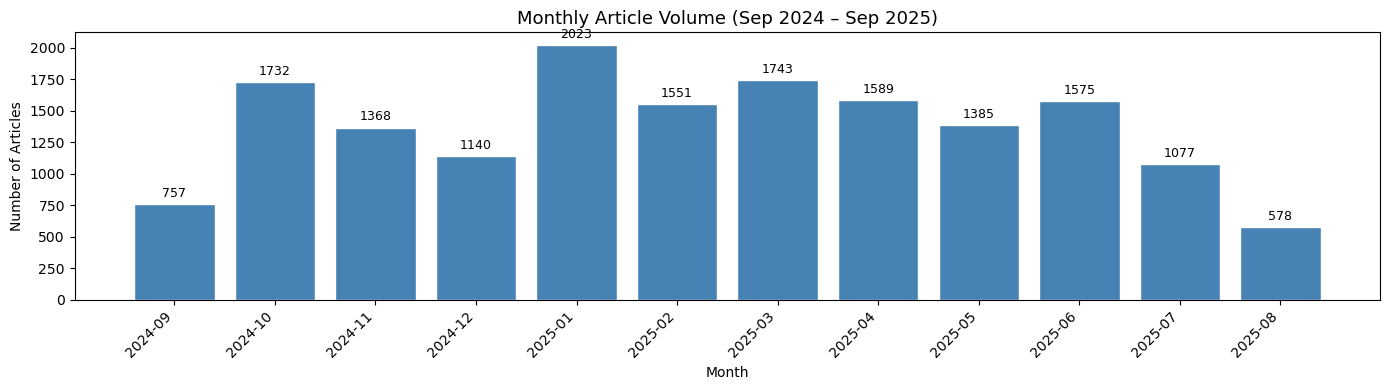

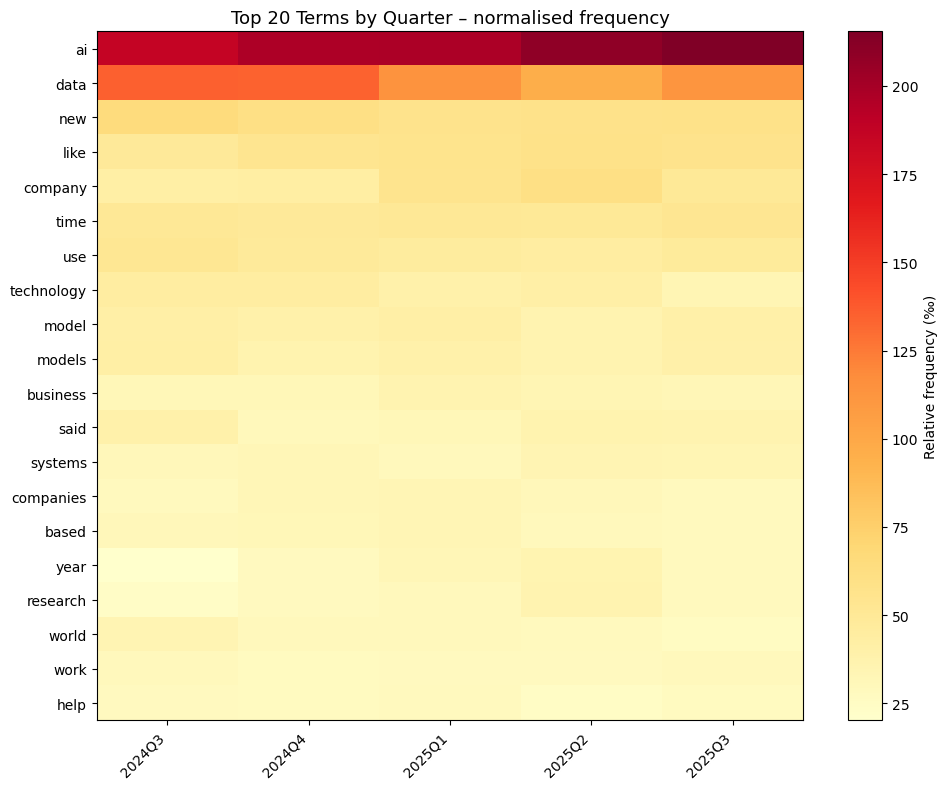

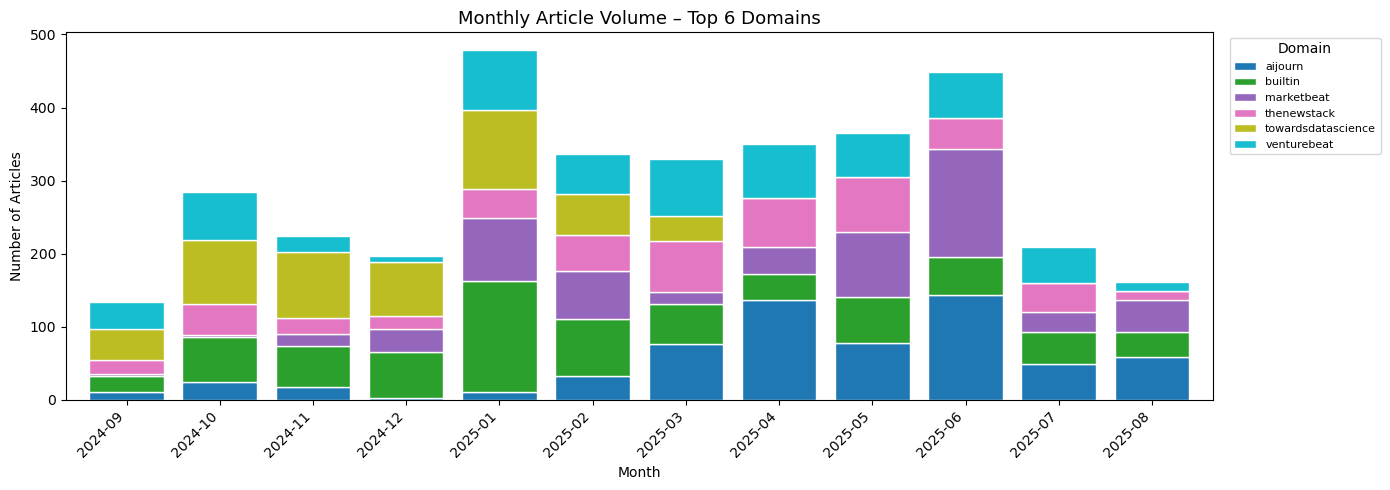

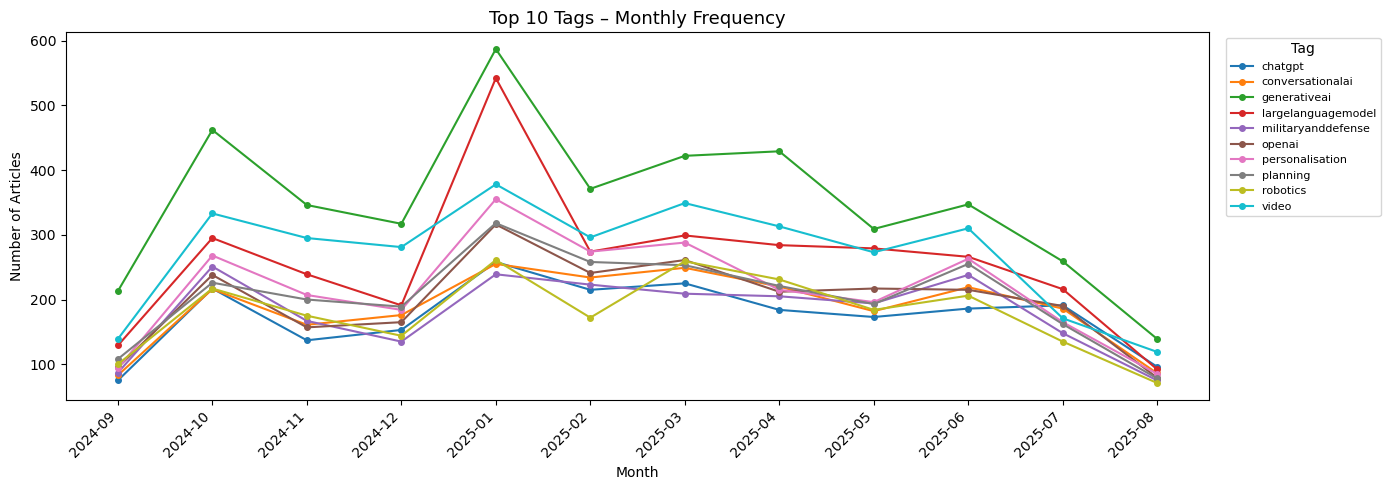

In [48]:
# --- 1. Monthly article volume ---
monthly_counts = df_eda.groupby('year_month').size().reset_index(name='count')
monthly_counts['label'] = monthly_counts['year_month'].astype(str)

fig, ax = plt.subplots(figsize=(14, 4))
bars = ax.bar(monthly_counts['label'], monthly_counts['count'],
              color='steelblue', edgecolor='white')
ax.bar_label(bars, padding=3, fontsize=9)
ax.set_title('Monthly Article Volume (Sep 2024 – Sep 2025)', fontsize=13)
ax.set_xlabel('Month')
ax.set_ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- 2. Top terms by quarter (heatmap) ---
TOP_N = 20

# Build per-quarter Counters with a plain loop — avoids MultiIndex issues
# that arise from groupby().apply() returning non-Series objects in pandas 2.x
quarter_term_dict = {}
for q, group in df_eda.groupby('quarter'):
    quarter_term_dict[q] = Counter(
        t for tokens in group['content_lemma_norm']
        if isinstance(tokens, list)
        for t in tokens
    )

# Globally top-N terms
all_counts = Counter()
for c in quarter_term_dict.values():
    all_counts.update(c)
top_terms = [term for term, _ in all_counts.most_common(TOP_N)]

quarters = sorted(str(q) for q in quarter_term_dict.keys())
matrix = pd.DataFrame(
    {q: [quarter_term_dict[pd.Period(q)].get(t, 0) for t in top_terms]
     for q in quarters},
    index=top_terms
)

# Normalise per quarter (per-mille) so volume differences don't dominate
matrix_pct = matrix.div(matrix.sum(axis=0).replace(0, 1), axis=1) * 1000

fig, ax = plt.subplots(figsize=(max(6, len(quarters) * 2), 8))
im = ax.imshow(matrix_pct.values, aspect='auto', cmap='YlOrRd')
ax.set_xticks(range(len(quarters)))
ax.set_xticklabels(quarters, rotation=45, ha='right')
ax.set_yticks(range(len(top_terms)))
ax.set_yticklabels(top_terms)
plt.colorbar(im, ax=ax, label='Relative frequency (‰)')
ax.set_title(f'Top {TOP_N} Terms by Quarter – normalised frequency', fontsize=13)
plt.tight_layout()
plt.show()

# --- 3. Domain distribution over time ---
TOP_DOMAINS = 6

top_domains = df_eda['domain'].value_counts().nlargest(TOP_DOMAINS).index.tolist()
domain_monthly = (
    df_eda[df_eda['domain'].isin(top_domains)]
    .groupby(['year_month', 'domain'])
    .size()
    .unstack(fill_value=0)
)
domain_monthly.index = domain_monthly.index.astype(str)

fig, ax = plt.subplots(figsize=(14, 5))
domain_monthly.plot(kind='bar', stacked=True, ax=ax,
                    colormap='tab10', edgecolor='white', width=0.8)
ax.set_title(f'Monthly Article Volume – Top {TOP_DOMAINS} Domains', fontsize=13)
ax.set_xlabel('Month')
ax.set_ylabel('Number of Articles')
ax.legend(title='Domain', bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=8)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- 4. Top tags over time ---
TOP_TAGS = 10

df_tags = df_eda[['year_month', 'tags']].explode('tags').dropna(subset=['tags'])
df_tags = df_tags[df_tags['tags'].str.strip() != '']

top_tags = df_tags['tags'].value_counts().nlargest(TOP_TAGS).index.tolist()
tag_monthly = (
    df_tags[df_tags['tags'].isin(top_tags)]
    .groupby(['year_month', 'tags'])
    .size()
    .unstack(fill_value=0)
)
tag_monthly.index = tag_monthly.index.astype(str)

fig, ax = plt.subplots(figsize=(14, 5))
for tag in tag_monthly.columns:
    ax.plot(tag_monthly.index, tag_monthly[tag], marker='o', markersize=4, label=tag)
ax.set_title(f'Top {TOP_TAGS} Tags – Monthly Frequency', fontsize=13)
ax.set_xlabel('Month')
ax.set_ylabel('Number of Articles')
ax.legend(title='Tag', bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=8)
plt.xticks(range(len(tag_monthly)), tag_monthly.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Sentiment Analysis: How Does Tone Vary Across AI Topics?

We use **VADER** (Valence Aware Dictionary and sEntiment Reasoner) from NLTK to score each article. VADER is rule-based, requires no training, and is well-suited for news/media prose.

The **compound score** summarises overall tone on a scale from −1 (most negative) to +1 (most positive). Standard thresholds:
- **Positive**: compound ≥ 0.05
- **Negative**: compound ≤ −0.05
- **Neutral**: −0.05 < compound < 0.05

Three views:
- **Overall distribution** of compound scores + class breakdown
- **By AI topic (tag)** — mean score with 95 % confidence interval
- **Over time** — monthly mean with interquartile range

Articles scored : 16,518

sentiment
positive    15628
negative      883
neutral         7

Mean compound : 0.890
Std  compound : 0.434


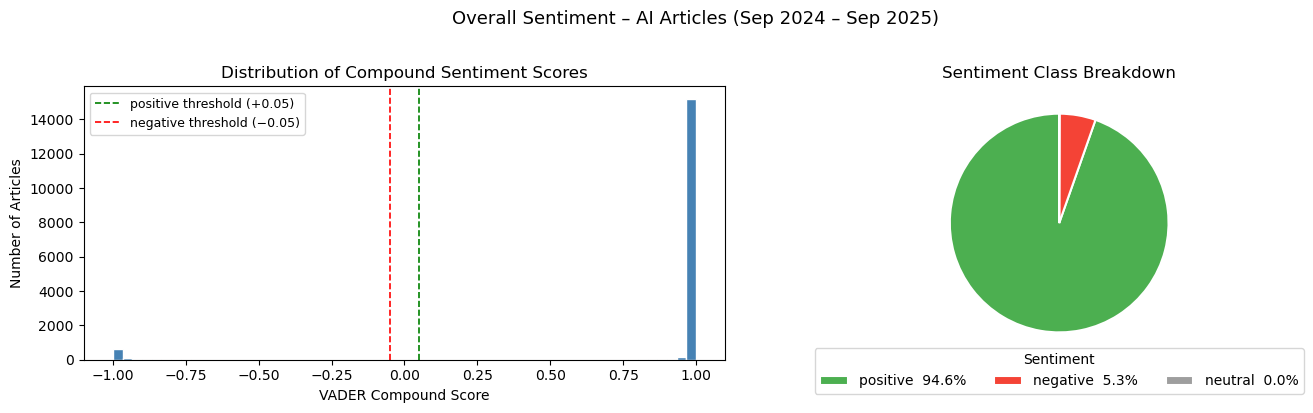

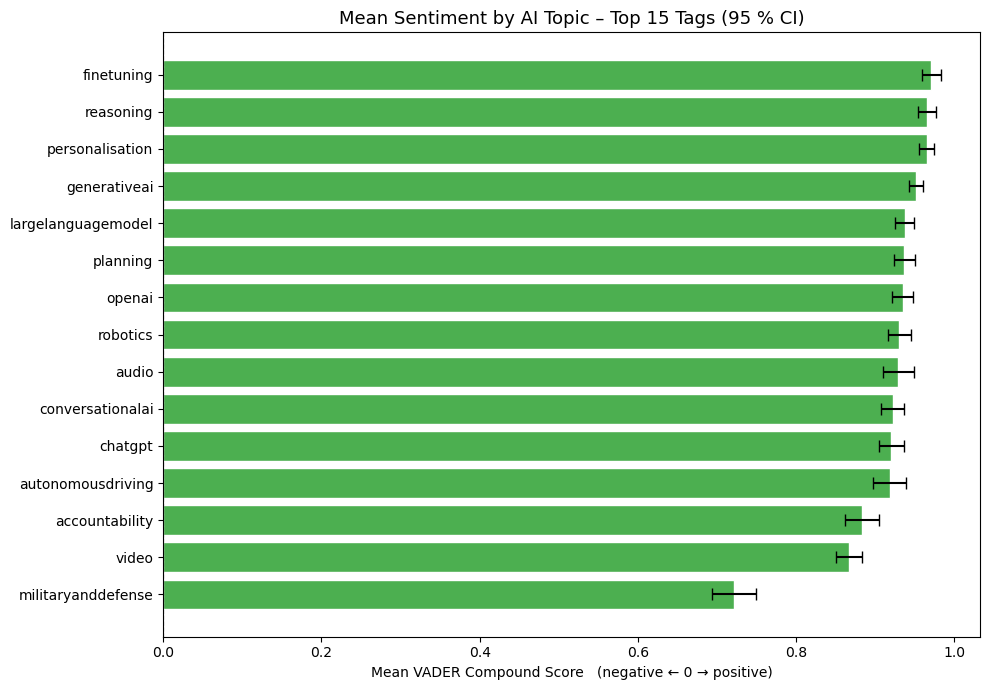

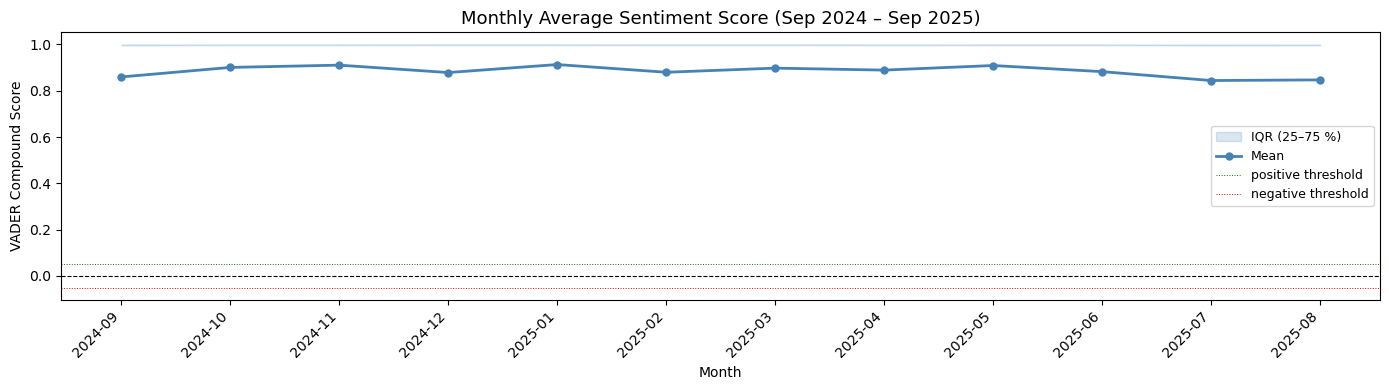

In [52]:
# --- Sentiment setup: VADER scoring ---
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon', quiet=True)
sia = SentimentIntensityAnalyzer()

# Score on cleaned content text — VADER works on full sentences, not token lists
# df_eda is already filtered to Sep 2024–Sep 2025 and has year_month / quarter
df_sent = df_eda[['date', 'year_month', 'quarter', 'domain', 'tags', 'content']].copy()

scores = df_sent['content'].apply(lambda t: sia.polarity_scores(str(t)))
df_sent['compound'] = scores.apply(lambda s: s['compound'])
df_sent['pos']      = scores.apply(lambda s: s['pos'])
df_sent['neu']      = scores.apply(lambda s: s['neu'])
df_sent['neg']      = scores.apply(lambda s: s['neg'])

# Standard VADER thresholds
df_sent['sentiment'] = df_sent['compound'].apply(
    lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral')
)

print(f"Articles scored : {len(df_sent):,}")
print()
print(df_sent['sentiment'].value_counts().to_string())
print(f"\nMean compound : {df_sent['compound'].mean():.3f}")
print(f"Std  compound : {df_sent['compound'].std():.3f}")
# --- Chart 1: Overall sentiment distribution ---
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Histogram of compound scores
ax = axes[0]
ax.hist(df_sent['compound'], bins=60, color='steelblue', edgecolor='white')
ax.axvline( 0.05, color='green', linestyle='--', linewidth=1.2, label='positive threshold (+0.05)')
ax.axvline(-0.05, color='red',   linestyle='--', linewidth=1.2, label='negative threshold (−0.05)')
ax.set_title('Distribution of Compound Sentiment Scores', fontsize=12)
ax.set_xlabel('VADER Compound Score')
ax.set_ylabel('Number of Articles')
ax.legend(fontsize=9)

# Pie: share of each sentiment class
ax = axes[1]
counts = df_sent['sentiment'].value_counts()
colors_map = {'positive': '#4CAF50', 'neutral': '#9E9E9E', 'negative': '#F44336'}
total = counts.sum()
# Percentages go into the legend labels — no text on wedges avoids all overlap
legend_labels = [f'{lbl}  {cnt/total*100:.1f}%' for lbl, cnt in counts.items()]
wedges, _ = ax.pie(
    counts,
    labels=None,
    autopct=None,          # percentages shown in legend instead
    colors=[colors_map[l] for l in counts.index],
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)
ax.legend(
    wedges, legend_labels,
    title='Sentiment',
    loc='lower center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=3,
    fontsize=10
)
ax.set_title('Sentiment Class Breakdown', fontsize=12)

plt.suptitle('Overall Sentiment – AI Articles (Sep 2024 – Sep 2025)', fontsize=13, y=1.02)
plt.tight_layout()
plt.show()
# --- Chart 2: Mean sentiment score by top AI topic (tag) ---
TOP_SENT_TAGS = 15

df_tag_sent = df_sent[['tags', 'compound']].explode('tags').dropna(subset=['tags'])
df_tag_sent = df_tag_sent[df_tag_sent['tags'].str.strip() != '']

top_sent_tags = df_tag_sent['tags'].value_counts().nlargest(TOP_SENT_TAGS).index.tolist()
df_tag_sent = df_tag_sent[df_tag_sent['tags'].isin(top_sent_tags)]

tag_stats = (
    df_tag_sent.groupby('tags')['compound']
    .agg(mean='mean', std='std', count='count')
    .assign(ci95=lambda d: 1.96 * d['std'] / d['count'].pow(0.5))
    .sort_values('mean')
)

fig, ax = plt.subplots(figsize=(10, 7))
bar_colors = ['#F44336' if m < 0 else '#4CAF50' for m in tag_stats['mean']]
ax.barh(
    tag_stats.index, tag_stats['mean'],
    xerr=tag_stats['ci95'],
    color=bar_colors, edgecolor='white', capsize=4
)
ax.axvline(0, color='black', linewidth=0.8, linestyle='--')
ax.set_title(f'Mean Sentiment by AI Topic – Top {TOP_SENT_TAGS} Tags (95 % CI)', fontsize=13)
ax.set_xlabel('Mean VADER Compound Score   (negative ← 0 → positive)')
plt.tight_layout()
plt.show()
# --- Chart 3: Monthly sentiment trend ---
monthly_sent = (
    df_sent.groupby('year_month')['compound']
    .agg(
        mean='mean',
        q25=lambda x: x.quantile(0.25),
        q75=lambda x: x.quantile(0.75)
    )
    .reset_index()
)
monthly_sent['label'] = monthly_sent['year_month'].astype(str)

fig, ax = plt.subplots(figsize=(14, 4))
ax.fill_between(
    monthly_sent['label'],
    monthly_sent['q25'], monthly_sent['q75'],
    alpha=0.2, color='steelblue', label='IQR (25–75 %)'
)
ax.plot(
    monthly_sent['label'], monthly_sent['mean'],
    marker='o', color='steelblue', linewidth=2, markersize=5, label='Mean'
)
ax.axhline( 0.05, color='green', linewidth=0.7, linestyle=':', label='positive threshold')
ax.axhline(-0.05, color='red',   linewidth=0.7, linestyle=':', label='negative threshold')
ax.axhline(0,     color='black', linewidth=0.8, linestyle='--')
ax.set_title('Monthly Average Sentiment Score (Sep 2024 – Sep 2025)', fontsize=13)
ax.set_xlabel('Month')
ax.set_ylabel('VADER Compound Score')
ax.legend(fontsize=9)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 1.4 Entity and Relationship Extraction

*Done by: XXX  - Checked by: XXX*

## 1.5 Knowledge Graph Construction

*Done by: XXX  - Checked by: XXX*

## 1.6 Topic Modeling

*Done by: XXX  - Checked by: XXX*